We will now learn about Convolutional Neural Network (CNN or ConvNet). CNN's are known for their capabilities to find patterns in visual data. And since we dealt with Fashion data in earlier notebook, let's see if using a CNN model can improve deal with number images. 

It follows the typical structure of a convolutional neural network:
Input layer --> [Convolutional layer -> activation layer -> pooling layer] -> Output layer
where the layers in [] can be repeated multiple times! 

Today, CNN’s are used in many computer vision applications such as facial recognition, image search, and editing, augmented reality, and more. 

When to use CNN and when to use ANN:

CNNs work best when the data can be represented in a spatial manner, say an image in M $\times$ N pixels. If you data is just as useful after shuffling any of your columns with each other then you cannot use CNN.

Suppose we are looking for a house dataset with area and price (two columns as features). Swapping changes nothing. In those case, ANNs are preferred! However, if we swap the columns (which are essentially pixel arrays) in my image, I am surely going to mess up my actual image. Hence, we use CNN here! 

In [2]:
import numpy as np
np.random.seed(123)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [4]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print( X_train.shape)

(60000, 28, 28)


60,000 samples in our training set, and the images are 28 pixels x 28 pixels each. We can confirm this by plotting the first sample in matplotlib:

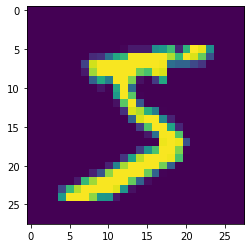

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print( X_train.shape )

(60000, 28, 28, 1)


The final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
print(y_train.shape)

(60000,)


In [15]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)

(60000, 10)


In [16]:
print(Y_train[:5,:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [26]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1), padding = 'same'))
# In 1d for ex.: model.add(Convolution1D(64, 3, border_mode='same', input_shape=(10, 32)))
#print(model.output_shape)
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

The choice of 32 above is arbitrary! A kernel is a small grid of numbers and you pass it over your whole image i.e. all the pixels in your input image, and transforming it based on what those numbers are. By using different numbers in the kernels, you can perform different types of image preprocessing (during image recognition) such as contrast, blur, sharpen, or edge detection. Generally speaking, the kernel is smaller than the image, and 3x3 is a pretty common choice. 

Check this for more explanation: https://towardsdatascience.com/beginners-guide-to-building-convolutional-neural-networks-using-tensorflow-s-keras-api-in-python-6e8035e28238



In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 144s 74ms/step - loss: 0.2059 - accuracy: 0.9395
Epoch 2/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0861 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 145s 78ms/step - loss: 0.0662 - accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0554 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 140s 74ms/step - loss: 0.0424 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0365 - accuracy: 0.9885
Epoch 8/10
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0325 - accuracy: 0.9897
Epoch 9/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0303 - accuracy: 0.9905
Epoch 10/10
1875/1875 [==============================] 

In [29]:
score = model.evaluate(X_test, Y_test, verbose=0) # loss and accuracy

In [36]:
scores = []
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
scores.append(score[1] * 100)
#print("%.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))

accuracy: 99.14%
99.14% (+/- 0.00%)
